# Code cơ bản

Dựa theo bài thực hành

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/weather_classification_data.csv')

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
data.groupby(["Weather Type"]).count()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
Weather Type,,,,,,,,,,
Cloudy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Rainy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Snowy,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300
Sunny,3300,3300,3300,3300,3300,3300,3300,3300,3300,3300


In [ ]:
#sns.pairplot(data, hue='Weather Type')

In [ ]:
print(data["Weather Type"].nunique())
print(data["Weather Type"].unique())

4
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


Tham khảo ở đây nhé https://www.kaggle.com/code/niketasengar/weather-type-classification#Correlation-Analysis

In [ ]:
print(data["Location"].nunique())
print(data["Location"].unique())

print(data["Cloud Cover"].nunique())
print(data["Cloud Cover"].unique())

print(data["Season"].nunique())
print(data["Season"].unique())

3
['inland' 'mountain' 'coastal']
4
['partly cloudy' 'clear' 'overcast' 'cloudy']
4
['Winter' 'Spring' 'Summer' 'Autumn']


In [ ]:
location_mapping = {location: idx for idx, location in enumerate(data["Location"].unique())}
cloud_cover_mapping = {cloud_cover: idx for idx, cloud_cover in enumerate(data["Cloud Cover"].unique())}
season_mapping = {season: idx for idx, season in enumerate(data["Season"].unique())}
weatype_mapping = {weatype: idx for idx, weatype in enumerate(data['Weather Type'].unique())}

data["Location"] = data["Location"].map(location_mapping)
data["Cloud Cover"] = data["Cloud Cover"].map(cloud_cover_mapping)
data["Season"] = data["Season"].map(season_mapping)
data['Weather Type'] = data['Weather Type'].map(weatype_mapping)

In [ ]:
data.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0


<Axes: >

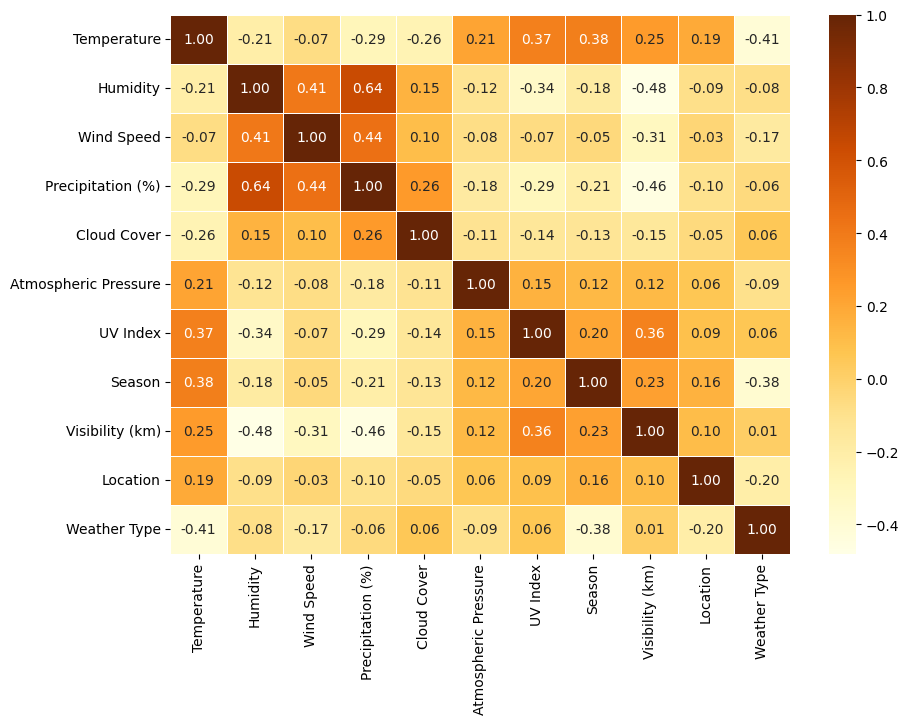

In [ ]:
plt.figure(figsize=(10,7))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5, linecolor='white', cmap='YlOrBr', fmt='.2f')

In [ ]:
num_shapes = data.shape[0]
print(num_shapes)
num_columns = len(data.columns)
print(num_columns)

13200
11


In [ ]:
#X = data.iloc[0:100,0:num_columns-1].values
#y = data.iloc[0:100,num_columns-1].
X = data.iloc[:,0:10].values
y = data.iloc[:,10].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall =  recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('accuracy decisionTree: %.3f' %accuracy)
print('precision decisionTree: %.3f' %precision)
print('recall decisionTree: %.3f' %recall)
print('f1-score decisionTree : %.3f' %f1)

accuracy decisionTree: 0.914
precision decisionTree: 0.914
recall decisionTree: 0.914
f1-score decisionTree : 0.914


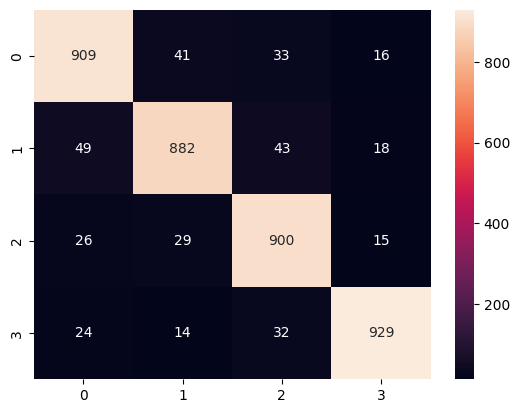

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

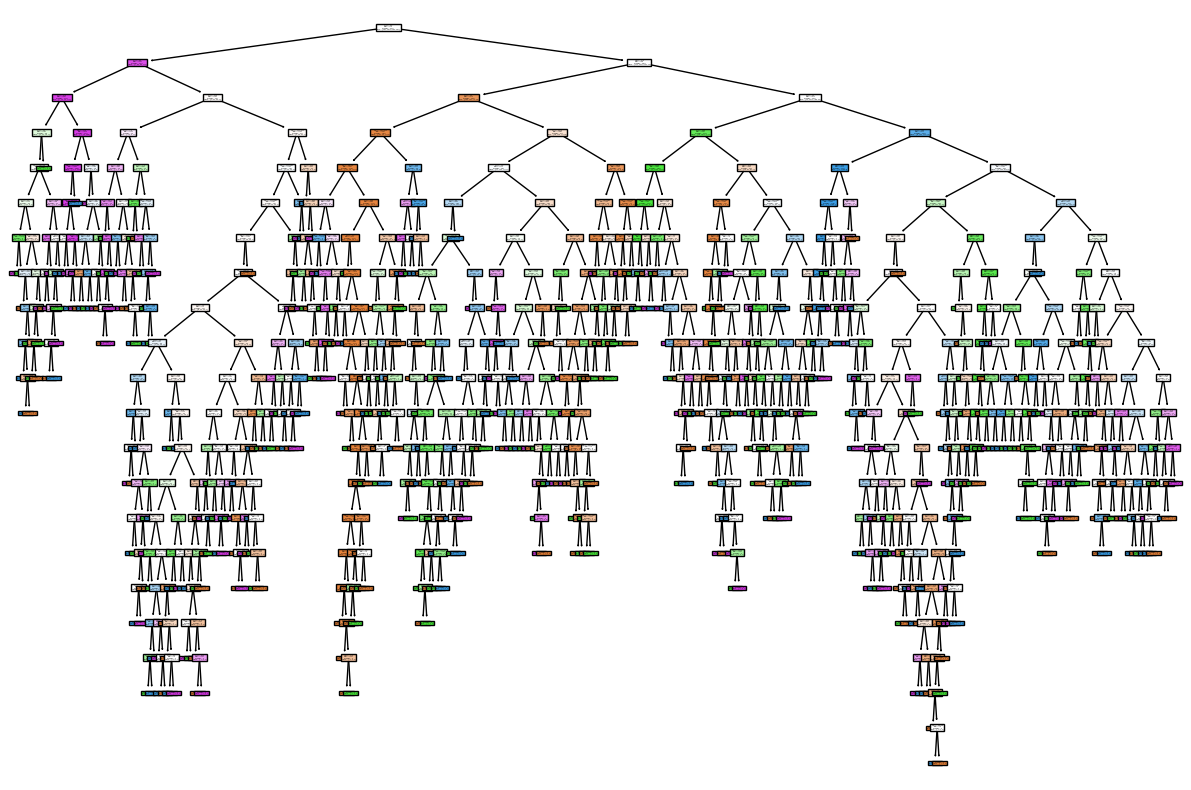

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(decision_tree, filled=True)
plt.show()

KNeighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('accurac kNN : %.3f' %accuracy)
print('precision kNN : %.3f' %precision)
print('recall kNN: %.3f' %recall)
print('f1-score kNN : %.3f' %f1)

accurac kNN : 0.897
precision kNN : 0.897
recall kNN: 0.897
f1-score kNN : 0.897


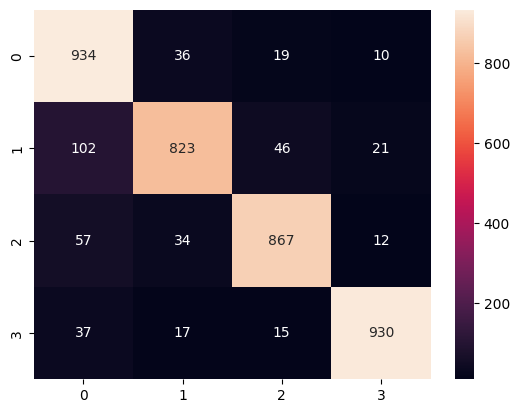

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Cải tiến?

Ta sử dụng Random Forest để cải thiện Decision Tree.
Trước hết phân tích xem có thuộc tính nào rút gọn bớt được không?

<Axes: >

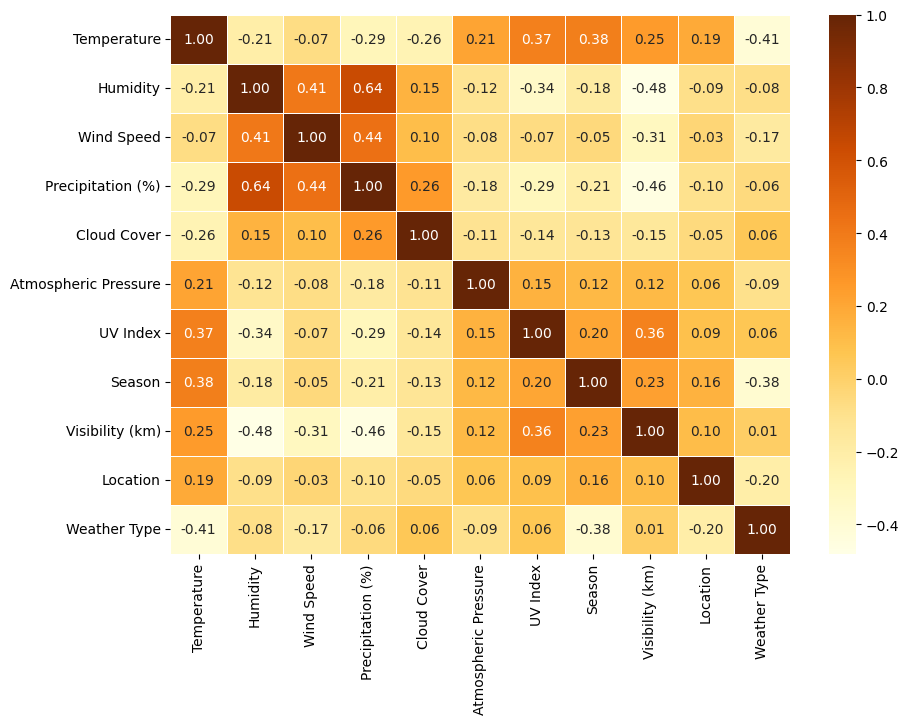

In [ ]:
# Nhìn lại độ tương đồng
plt.figure(figsize=(10,7))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5, linecolor='white', cmap='YlOrBr', fmt='.2f')

Nhưng ô có màu đậm (tương đồng lớn) bao gồm:



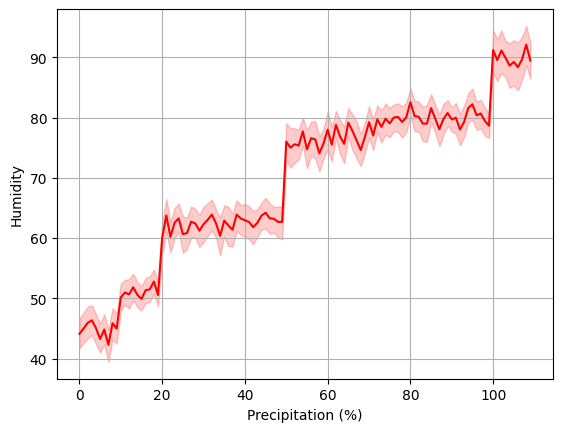

In [ ]:
sns.lineplot(x="Precipitation (%)",y='Humidity',data=data,color='red')
plt.grid()

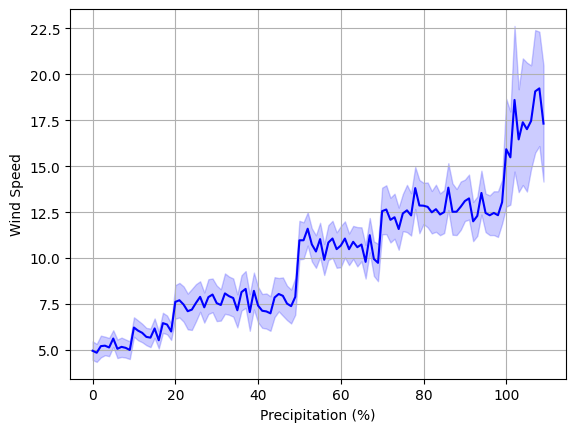

In [ ]:
sns.lineplot(x="Precipitation (%)",y='Wind Speed',data=data,color='blue')
plt.grid()

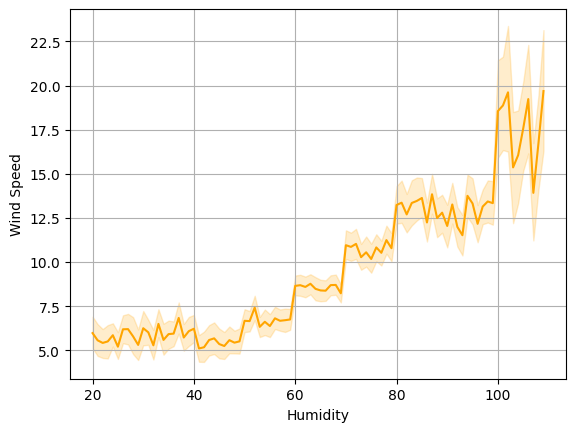

In [ ]:
sns.lineplot(x="Humidity",y='Wind Speed',data=data,color='orange')
plt.grid()

Có thể thấy, Precipitation có mối quan hệ rất lớn với Humidity và Wind Speed.
Ta thử bỏ bớt thuộc tính này đi.

In [ ]:
X = data.drop(columns=['Weather Type','Precipitation (%)']) #bỏ precipitation
#X = data.drop(columns=['Weather Type']) #đã test không bỏ, thấy acc thấp hơn
y = data['Weather Type']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Dùng hàm fit có transform, phân chia tập dữ liệu chuẩn hoá

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Sử dụng RandomForest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('accurac rf : %.3f' %accuracy)
print('precision rf : %.3f' %precision)
print('recall rf: %.3f' %recall)
print('f1-score rf : %.3f' %f1)

accurac rf : 0.921
precision rf : 0.921
recall rf: 0.921
f1-score rf : 0.921


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       999
           1       0.93      0.89      0.91       992
           2       0.91      0.93      0.92       970
           3       0.94      0.93      0.94       999

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



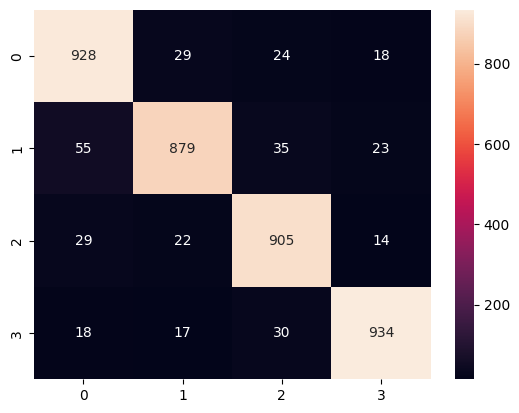

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()